In [1]:
from pydataset import data

swiss = data('swiss')

In [2]:
data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

We'll be using Fertility as our target variable to predict.

2. Briefly take a look at the data. You won't need to do any cleaning or preparation, but you should get an overview of the data. Visualize the distribution of each variable, and take a look at how the individual features correlate with the target variable.

In [3]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


3. Split the data into training and test data sets.

In [4]:
swiss.plot.box(figsize=(12,10))

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

4. Fit a linear model using Agriculture and Catholic as the independent variables. Measure the model's performance.

In [6]:
train, test = train_test_split(swiss, train_size=.75, random_state=123)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [7]:
X = swiss.drop(columns='Fertility')
y = swiss.Fertility

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .75)

In [8]:
lm1 = LinearRegression()
lm1.fit(train[['Agriculture', 'Catholic']], train.Fertility)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
mse = mean_squared_error(train.Fertility, lm1.predict(train[['Agriculture', 'Catholic']]))
r2 = r2_score(train.Fertility, lm1.predict(train[['Agriculture', 'Catholic']]))
print(f'mse: {mse}, r^2: {r2}')

mse: 107.9829772746781, r^2: 0.20571412056121652


5. Fit a linear model using Education and Examination. Measure the model's performance.

In [11]:
lm2 = LinearRegression()
lm2.fit(train[['Education', 'Examination']], train.Fertility)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
mse = mean_squared_error(train.Fertility, lm1.predict(train[['Education', 'Examination']]))
r2 = r2_score(train.Fertility, lm1.predict(train[['Education', 'Examination']]))
print(f'mse: {mse}, r^2: {r2}')

mse: 165.46890756886603, r^2: -0.2171327378184047


6. Use the best of the above two models and measure that model's performance on the test set.

In [13]:
predicted = lm2.predict(test[['Education', 'Examination']])
actual = test.Fertility

In [14]:
mean_squared_error(actual, predicted), r2_score(actual, predicted)

(51.20932006225985, 0.7446902519892097)

7. Fit a linear model using all of the independent variables. Take a look at the resulting model's coefficients. What do these tell us? How do we interpret them?

In [15]:
lm = LinearRegression().fit(train.drop(columns='Fertility'), train.Fertility)

predicted = lm.predict(train.drop(columns='Fertility'))
actual = train.Fertility

mean_squared_error(actual, predicted)

45.69364052737513

In [16]:
list(zip(train.drop(columns='Fertility'), lm.coef_))

[('Agriculture', -0.2135215878064973),
 ('Examination', -0.3970413392464384),
 ('Education', -0.9191434875467087),
 ('Catholic', 0.11924830687492441),
 ('Infant.Mortality', 1.661910462058106)]

In [17]:
train.corr()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Fertility,1.000000,0.231235,-0.564010,-0.549146,0.451269,0.260643
Agriculture,0.231235,1.000000,-0.669208,-0.637985,0.420953,-0.312985
Examination,-0.564010,-0.669208,1.000000,0.641543,-0.641316,0.230872
Education,-0.549146,-0.637985,0.641543,1.000000,-0.165706,0.140627
Catholic,0.451269,0.420953,-0.641316,-0.165706,1.000000,-0.150834
Infant.Mortality,0.260643,-0.312985,0.230872,0.140627,-0.150834,1.000000


In [18]:
import seaborn as sns

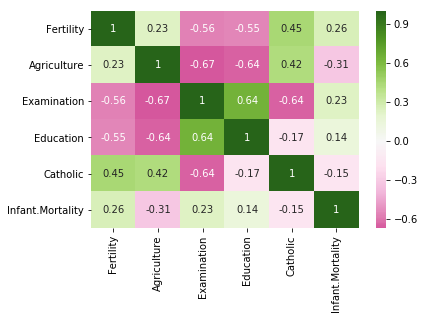

In [19]:
sns.heatmap(train.corr(), cmap='PiYG', center=0, annot=True)